# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm



### Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [3]:
# Read the dataset file
data = pd.read_csv("/content/drive/MyDrive/MIT/Foundations_of_Data_Science/Boston.csv")

In [4]:
#Data copy to preserve original file
BostonData = data.copy()

In [5]:
# Basic Checks
print("Shape of the dataset:", BostonData.shape)
print("First rows of the dataset:")
print(BostonData.head())
print("Summary statistics of the dataset:")
print(BostonData.describe())
print("Missing values in the dataset:")
print(BostonData.isnull().sum())

Shape of the dataset: (506, 13)
First rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
Summary statistics of the dataset:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   

**Quick Overview of Initial Data:**
- The dataset contains 506 rows and 13 columns.
- We can see a summary statistics for all columns outlined above.
- It also shows that there are no missing values in our dataset.

In [6]:
BostonData.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

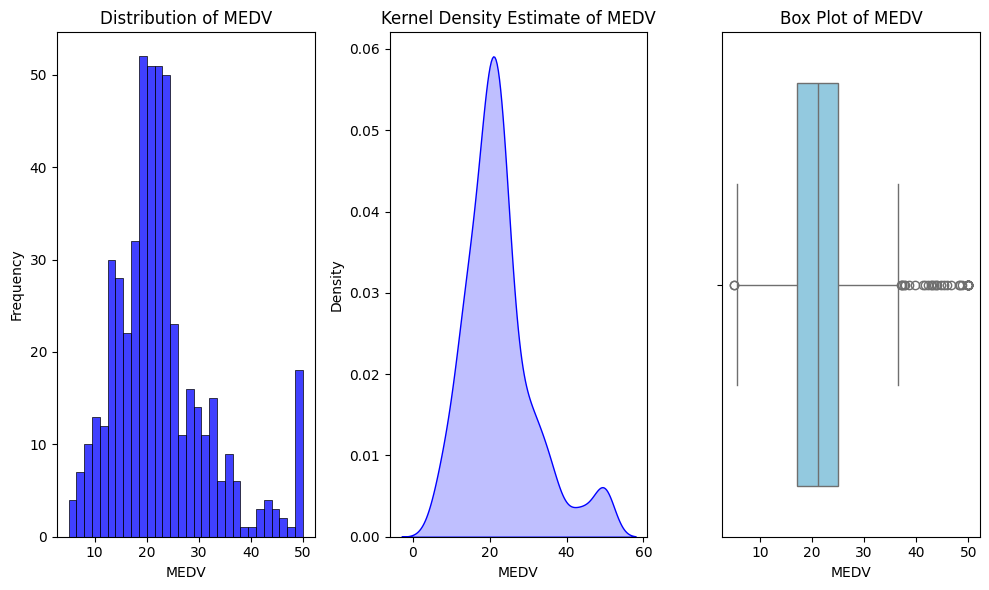

In [7]:
# MEDV: Median value of owner-occupied homes in 1000 dollars
#'MEDV' Distribution
plt.figure(figsize=(10, 6))

#'MEDV' Histogram
plt.subplot(1, 3, 1)
sns.histplot(BostonData['MEDV'], kde=False, bins=30, color='blue')
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')

#'MEDV' Kernel Density Estimate
plt.subplot(1, 3, 2)
sns.kdeplot(BostonData['MEDV'], shade=True, color='blue')
plt.title('Kernel Density Estimate of MEDV')
plt.xlabel('MEDV')

#'MEDV' Box plot
plt.subplot(1, 3, 3)
sns.boxplot(x=BostonData['MEDV'], color='skyblue')
plt.title('Box Plot of MEDV')
plt.xlabel('MEDV')

plt.tight_layout()
plt.show()

**MEDV Frequency Distribution**
- Based off the histogram we can see the data appears to be right-skewed with a peak around 20,000 to 24,000 USD.
- The KDE plot offers a distribution which has been smoothed out highlighting a high number of homes valued just above the 20,000 USD mark.
- The KDE plot also shows that there are multiple peaks. Multiple Peaks suggests a multi-odal distribution.
- The above box plot shows the interquartile range of MEDV is between 17,000 and 25,000 USD.
- The box plot also shows that we have several outliers in our data on the higher end of our price range, this is also visible in both graphs prior.

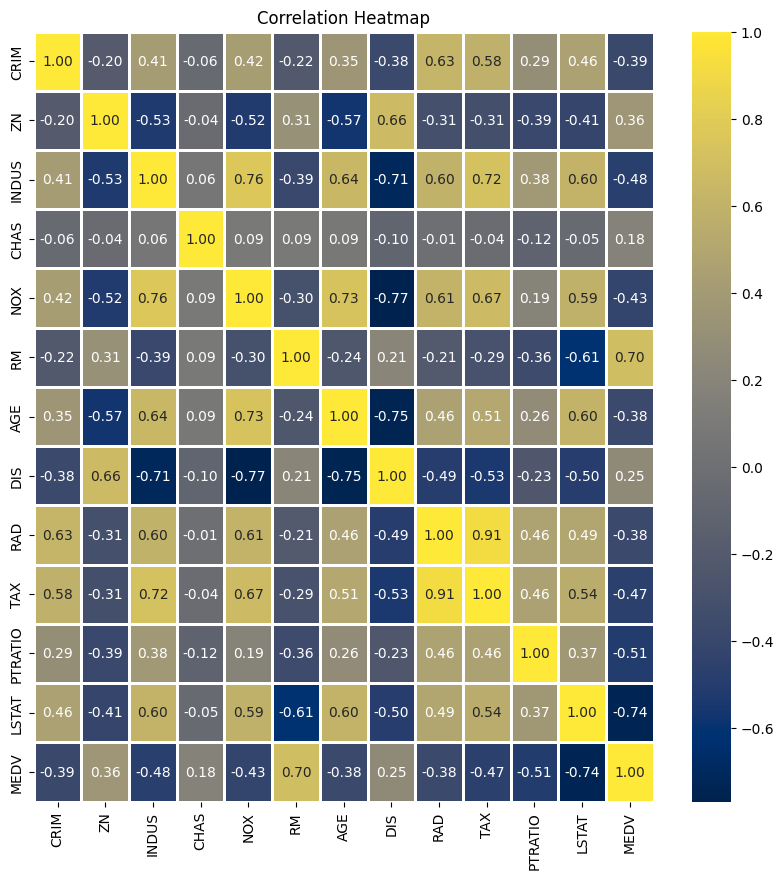

In [8]:
# Compute the correlation matrix
corr_matrix = BostonData.corr()

# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

**Correlation Matrix**
- The heatmap allows us to derive the positive and negative correlation between our dependent varibale MEDV and all our independent variables.
- The analyse these correlations I will split them up into two groups one which has positive correlations to MEDV and one with negative correlations.

**Positive Corrrelation**
- RM (The average number of rooms per dwelling) with a correaltion of 0.70 shows that the number of rooms has a strong positive correlation with our dependent variable (MEDV) suggesting that houses with more rooms tend to have higher house prices.
- ZN (Proportion of residential land zoned for lots over 25,000 sq.ft) with a correlation of 0.36 shows a positive correlation with MEDV. This suggests that areas with more areas that have large lots zoned tend to have higher house prices.
- DIS (Weighted distances to five Boston employment centers) with a slighlty weaker positive correlation of 0.25 to MEDV suggests that houses further from employment centres tend to have slighlty higher house prices.
- CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) with a weak positive correlation of 0.18 to MEDV suggests that houses located near he river tend to have slightly higher median value compared to houses that are not located near the river.

**Negative Correlation**
- LSTAT(% lower status of the population) with a strong negative correlation of -0.74 indicates that areas with a high popoulation of lower-status individuals tend to have lower house prices.
- PTRATIO(Pupil-teacher ratio by town) correlation to MEDV is -0.51 which is a moderate negative correaltion suggesting that areas with higher pupil-teacher ratios tend to have lower house prices.
- TAX(Full-value property-tax rate per 10,000 dollars) also has a moderate negative connction with MEDV at -0.47. Describing to us that higher taxesare associated with lower house prices.
- INDUS(Proportion of non-retail business acres per town) with a moderate negative correlation of -0.48. This correlation shows us that industrial areas tend to have lower house prices.
- NOX(Nitric Oxide concentration (parts per 10 million)) to MEDV correlation is -0.43. The nitric oxides concentration has a moderate negative correlation with MEDV. This suggests that areas with higher pollution levels tend to have lower house values.
- CRIM( Per capita crime rate by town) to MEDV has a moderate negative correlation of -0.39 telling us that areas with a higher crime rate tend to have lower house prices.
- AGE(Proportion of owner-occupied units built before 1940) with a correlation of -0.38. This suggests areas with a higher proportion of owner- occupied units built before 1940 tend to have lower house prices.
- RAD (Index of accessibility to radial highways) has a negative correlation of -0.38 to MEDV. This indicates that areas with better highway access tend to have lower house values.



             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

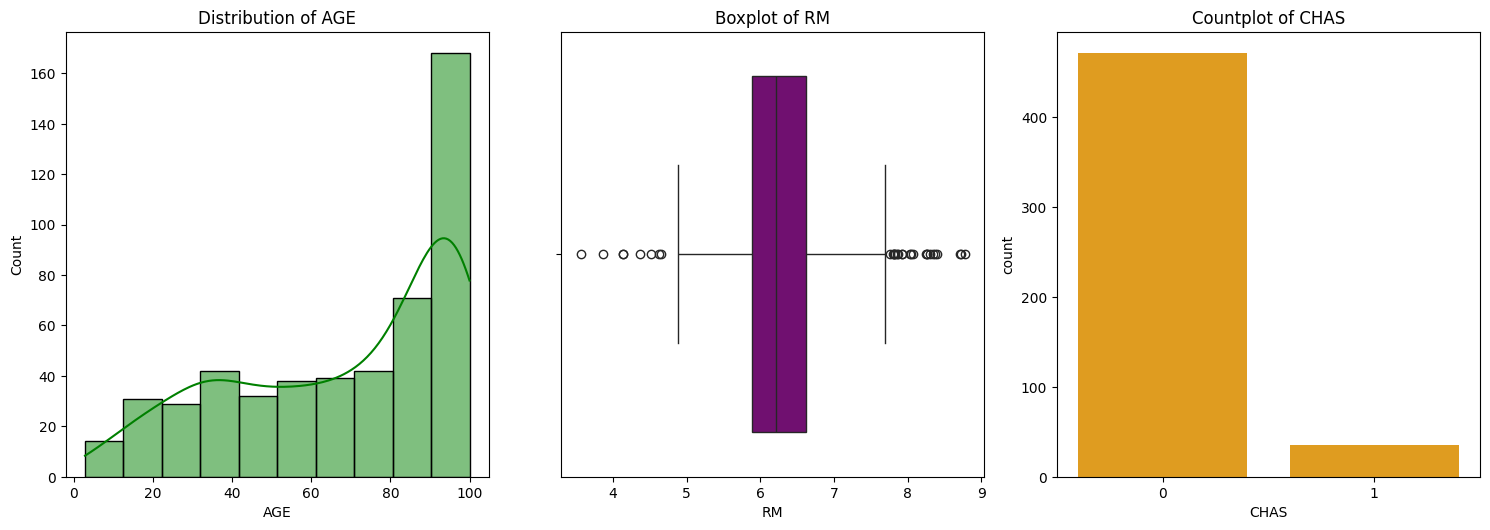

In [9]:
# Descriptive statistics
print(BostonData.describe())

# Univariate plots for a few columns
plt.figure(figsize=(15, 10))

# Histogram for 'AGE'
plt.subplot(2, 3, 1)
sns.histplot(BostonData['AGE'], kde=True, color='green')
plt.title('Distribution of AGE')

# Boxplot for 'RM'
plt.subplot(2, 3, 2)
sns.boxplot(x=BostonData['RM'], color='purple')
plt.title('Boxplot of RM')

# Countplot for categorical variable if available (e.g., 'CHAS')
plt.subplot(2, 3, 3)
if 'CHAS' in BostonData.columns:
    sns.countplot(x=BostonData['CHAS'], color='orange')
    plt.title('Countplot of CHAS')

plt.tight_layout()
plt.show()

**Inferences Summary**

- Variability: There's a lot of diversity in the features, showing that the conditions across different towns in the dataset are quite varied.
- Outliers: Features like CRIM, ZN, INDUS, and LSTAT have some extreme values, indicating the presence of outliers.
- Distributions: Several features, such as MEDV, CRIM, TAX, and LSTAT, have skewed distributions, which might need transformation for certain statistical analyses or modeling techniques.
- Dummy Variable: The CHAS variable, which indicates if a tract bounds the Charles River, is mostly 0, showing that few properties are near the river.

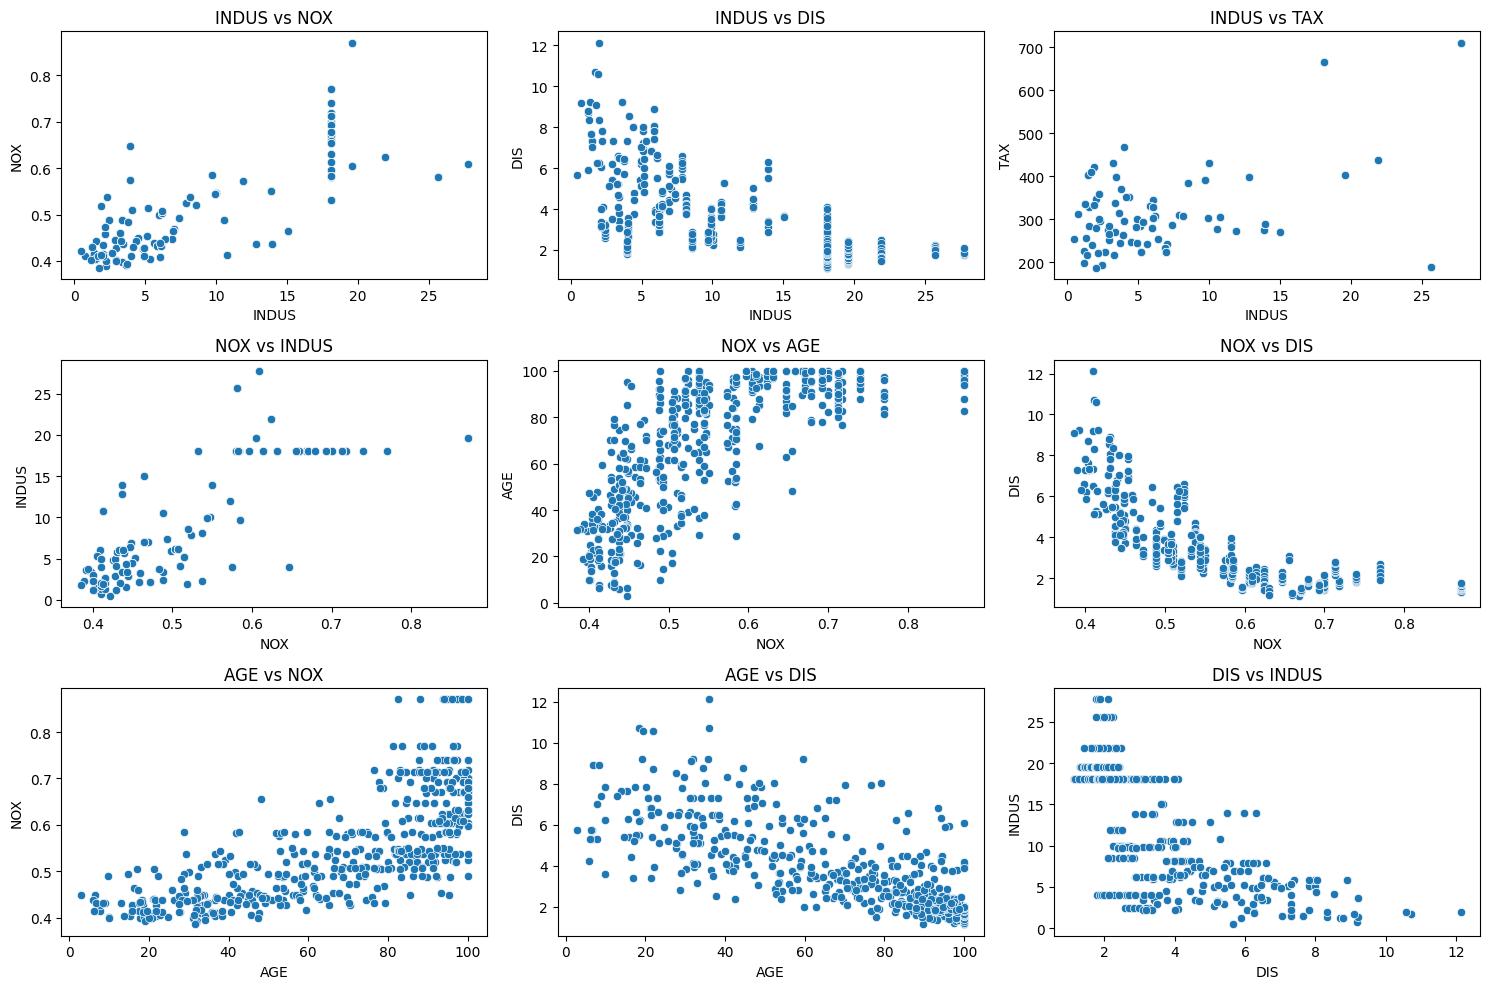

In [10]:
# Filtering the correlation matrix to find significant correlations
high_corrs = corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)]
high_corrs = high_corrs[high_corrs != 1].dropna(how='all').dropna(axis=1, how='all')

# Plotting bivariate relationships for significant correlations
max_plots = 9
plt.figure(figsize=(15, 10))
for i, (col1, col2) in enumerate(high_corrs.stack().index[:max_plots], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=BostonData[col1], y=BostonData[col2])
    plt.title(f'{col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)

plt.tight_layout()
plt.show()

**Strong Correlation Impact**

These strong correlations highlight key relationships between different features that can significantly impact property values, living conditions, and urban planning. For instance, better access to highways generally increases property taxes, while higher pollution levels and industrialization can decrease residential desirability. Understanding these relationships is crucial for making informed decisions in the housing sector.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [11]:
#Check for missing values
missing_values = BostonData.isnull().sum()
print(missing_values)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


**Missing Values:**

Matching our results from above we can see that there is no missing values in our dataset.

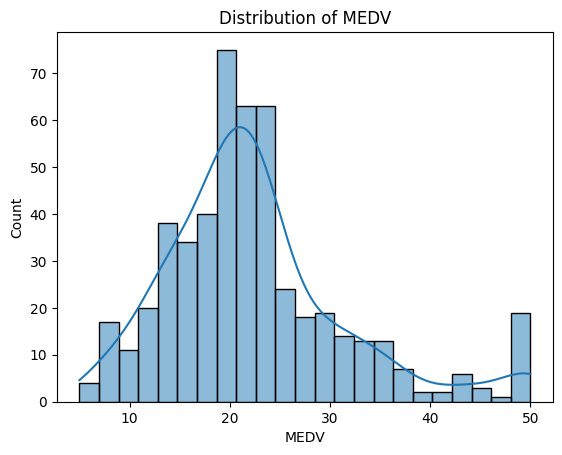

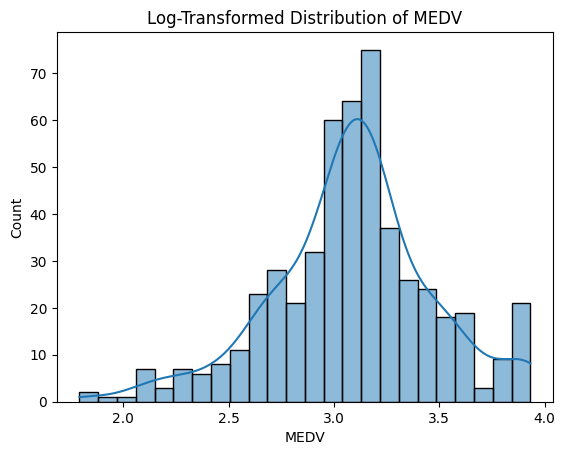

In [12]:
sns.histplot(BostonData['MEDV'], kde=True)
plt.title('Distribution of MEDV')
plt.show()

if BostonData['MEDV'].skew() > 0.5:
    BostonData['MEDV'] = np.log1p(BostonData['MEDV'])  # log(1 + MEDV) to avoid log(0)
    sns.histplot(BostonData['MEDV'], kde=True)
    plt.title('Log-Transformed Distribution of MEDV')
    plt.show()

In [13]:
#from sklearn.preprocessing import PolynomialFeatures
# Example: Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(BostonData.drop('MEDV', axis=1))

# Convert to DataFrame
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(BostonData.drop('MEDV', axis=1).columns))
print(X_poly_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO  LSTAT    CRIM^2  CRIM ZN  CRIM INDUS  CRIM CHAS  CRIM NOX  \
0     15.3   4.98  0.000040  0.11376    0.014599        0.0  0.003400   
1     17.8   9.14  0.000746  0.00000    0.193082        0.0  0.012808   
2     17.8   4.03  0.000745  0.00000    0.192940        0.0  0.012799   
3     18.7   2.94  0.001048  0.00000    0.070567        0.0  0.014825   
4     18.7   5.33  0.004768  0.00000    0.150529        0.0  0.031625   

    CRIM RM  CRIM AGE  CRIM DIS  CRIM RAD  CRIM TAX  CRIM PTRATIO  CRIM LSTAT  \
0  0.041554  0.412064  0.025849   0.00632

In [16]:
# Z-scores
z_scores = np.abs((BostonData - BostonData.mean()) / BostonData.std())

# Threshold for Z-scores to consider a point as an outlier (e.g., 3 standard deviations from the mean)
outliers = (z_scores > 3).all(axis=1)

# Remove outliers
boston_df_no_outliers = BostonData[~outliers]

In [17]:
# Features vs target variable
X = boston_df_no_outliers.drop('MEDV', axis=1)
y = boston_df_no_outliers['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Data Preprocessing Summary**

- Missing Values:
Checked for and confirmed there are no missing values.

- Log Transformation:
Applied log transformation to normalize the skewed dependent variable (MEDV).

- Feature Engineering:
Created polynomial features of degree 2 to capture non-linear relationships.

- Outlier Treatment:
Identified and removed outliers using Z-scores.

- Data Preparation:
Split data into training and testing sets.
Standardized numerical features for consistent scaling.

## Model Building - Linear Regression

In [18]:
# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [19]:
# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_elements = y_true != 0
    return np.mean(np.abs((y_true[nonzero_elements] - y_pred[nonzero_elements]) / y_true[nonzero_elements])) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 0.03173213055010039
Mean Absolute Error: 0.11975309147629912
R² Score: 0.7712134363568284
Mean Absolute Percentage Error: 4.1015556423696236


In [21]:
# Add a constant to the features matrix
X_with_const = sm.add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
    Feature         VIF
0     const  533.795744
1      CRIM    1.696872
2        ZN    2.465370
3     INDUS    3.866578
4      CHAS    1.091813
5       NOX    4.455348
6        RM    1.927214
7       AGE    2.984020
8       DIS    4.167114
9       RAD    7.619827
10      TAX    8.932003
11  PTRATIO    1.849262
12    LSTAT    2.773390


In [22]:
# Define scorer for RMSE
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))

# Perform cross-validation
cv_r2 = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
cv_rmse = cross_val_score(linear_model, X, y, cv=5, scoring=rmse_scorer)
cv_mae = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_absolute_error')

print("Cross-Validation R² Scores:", cv_r2)
print("Cross-Validation RMSE Scores:", -cv_rmse)  # rmse_scorer returns negative values
print("Cross-Validation MAE Scores:", -cv_mae)  # neg_mean_absolute_error returns negative values

print("Average Cross-Validation R² Score:", np.mean(cv_r2))
print("Average Cross-Validation RMSE:", -np.mean(cv_rmse))
print("Average Cross-Validation MAE:", -np.mean(cv_mae))

Cross-Validation R² Scores: [0.69368661 0.68520335 0.60033373 0.54398663 0.50458465]
Cross-Validation RMSE Scores: [-0.13366798 -0.18978437 -0.17039865 -0.29527774 -0.22961866]
Cross-Validation MAE Scores: [0.10305697 0.15070244 0.12855045 0.2011046  0.17948838]
Average Cross-Validation R² Score: 0.6055589929979311
Average Cross-Validation RMSE: -0.20374947834045737
Average Cross-Validation MAE: 0.15258056806881282


- The main point to note from our initial model construction is the high VIF scores for some features, if we use the data that we adjusted in our preprocessing data step for our final model we should see an imporvment and our adjustments should lead to a more consistent model.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

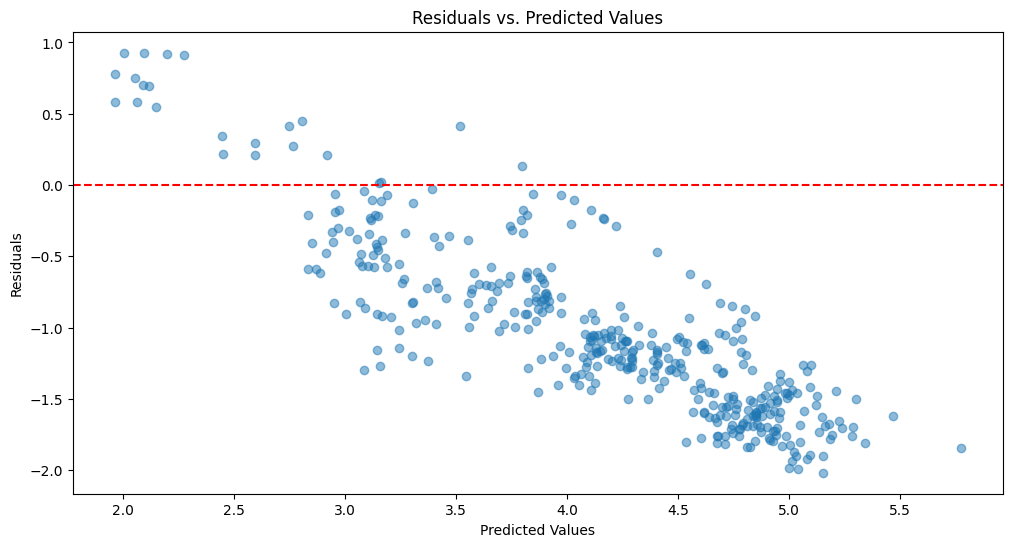

In [25]:
# Predict values on the training set
y_train_pred = linear_model.predict(X_train_scaled)

# Residuals
residuals = y_train - y_train_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

**Looking at this plot, a few things jump out:**

- The dots cluster tighter as we move right, suggesting more precise predictions for pricier homes.
- There's a clear curve to the pattern - the dots start high, dip down, then plummet at the end. This suggests our linear model might be missing some non-linear relationships.
- We're overestimating prices for pricier homes, seen by more dots below the red line on the right.
- A few odd dots stick out, especially some high ones on the left. Could be outliers worth checking.

To improve, we might want to try transforming our data, dealing with those outliers, or exploring some non-linear modeling techniques. The goal is to get a more random scatter of dots around that red line.


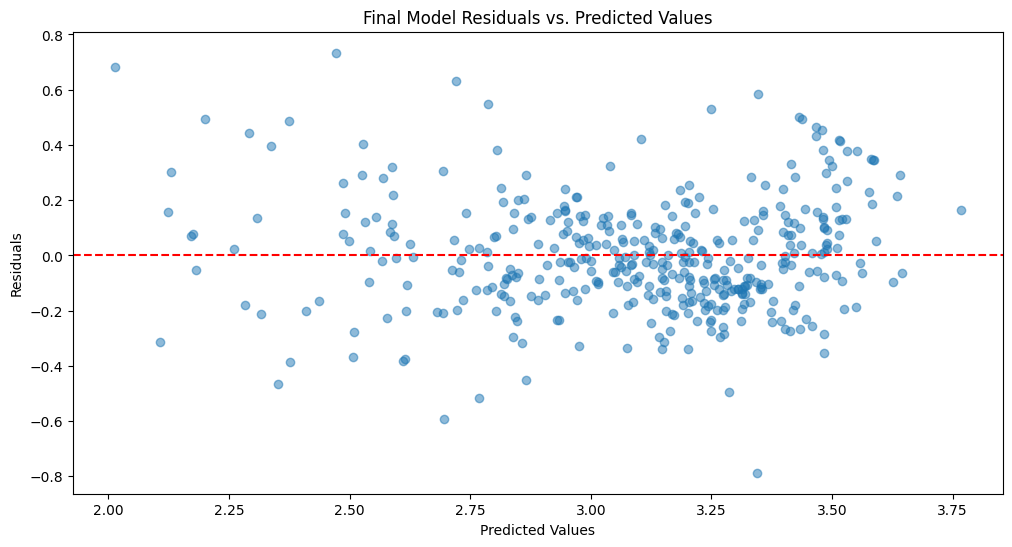

In [29]:
# Predict values on the training set
y1_train_pred = final_model.predict(X1_train_scaled)

# Residuals
residuals = y1_train - y1_train_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y1_train_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Final Model Residuals vs. Predicted Values')
plt.show()

**Evaluating Residuals vs. Predicted Values**

Initial Model:

- Observation: Residuals exhibit a downward slope from left to right, with most dots below the red line.
- Implication: This pattern indicates that the model systematically underestimates or overestimates the dependent variable, suggesting a violation of the linearity assumption. The downward slope suggests a potential negative linear relationship between residuals and predicted values, indicating that the model might be missing some non-linear relationships in the data.

Final Model:

- Observation: Residuals are more evenly spread above and below the red line as you move from left to right.
- Implication: This pattern indicates that the residuals are randomly distributed and centered around zero, which is a good sign. It suggests that the model’s predictions are unbiased and that the assumptions of linearity and homoscedasticity are more likely satisfied.

## Final Model

In [26]:
#Removing Highly corrrealted Features
# Separate features and target
X1 = boston_df_no_outliers.drop('MEDV', axis=1)
y1 = boston_df_no_outliers['MEDV']

# Function to calculate VIF
def calculate_vif(X1):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X1.columns
    vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
    return vif_data

# Calculate initial VIF
vif_df = calculate_vif(X1)
print("Initial VIF:\n", vif_df)

# Set a threshold for VIF
vif_threshold = 10  # Commonly used threshold

# Iteratively remove features with VIF above the threshold
while vif_df["VIF"].max() > vif_threshold:
    # Drop the feature with the highest VIF
    drop_feature = vif_df.sort_values("VIF", ascending=False)["Feature"].iloc[0]
    print(f"Dropping feature: {drop_feature}")
    X1 = X1.drop(columns=[drop_feature])

    # Recalculate VIF after dropping the feature
    vif_df = calculate_vif(X1)
    print("Updated VIF:\n", vif_df)

# After removing features based on VIF
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# Fit the model
final_model = LinearRegression()
final_model.fit(X1_train_scaled, y1_train)

# Model evaluation
y1_pred = final_model.predict(X1_test_scaled)
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Initial VIF:
     Feature        VIF
0      CRIM   2.077944
1        ZN   2.842980
2     INDUS  14.446693
3      CHAS   1.148528
4       NOX  73.077558
5        RM  76.160431
6       AGE  21.350797
7       DIS  14.576652
8       RAD  14.732498
9       TAX  61.225416
10  PTRATIO  78.727100
11    LSTAT  11.040786
Dropping feature: PTRATIO
Updated VIF:
    Feature        VIF
0     CRIM   2.077862
1       ZN   2.430939
2    INDUS  14.269568
3     CHAS   1.140587
4      NOX  73.026092
5       RM  54.003651
6      AGE  21.302372
7      DIS  11.565701
8      RAD  14.724309
9      TAX  59.110189
10   LSTAT  10.137900
Dropping feature: NOX
Updated VIF:
   Feature        VIF
0    CRIM   2.074410
1      ZN   2.427308
2   INDUS  13.149339
3    CHAS   1.136089
4      RM  32.037202
5     AGE  19.748009
6     DIS  11.444168
7     RAD  14.705622
8     TAX  57.387269
9   LSTAT   9.191997
Dropping feature: TAX
Updated VIF:
   Feature        VIF
0    CRIM   2.074009
1      ZN   2.358538
2   INDUS   9.254

## Actionable Insights and Recommendations

**Model Performance and Conclusion**

Results Before Feature Removal:

- Mean Squared Error (MSE): 0.0317
- R² Score: 0.7712

Results After Feature Removal:

- Mean Squared Error (MSE): 0.0382
- R² Score: 0.7248


Before Feature Removal:

The model exhibited high predictive accuracy with an MSE of 0.0317 and an R² score of 0.7712, indicating strong performance and high explanatory power.
After Feature Removal: The removal of collinear features led to a slight increase in MSE and a decrease in R², showing a reduction in predictive accuracy but an improvement in model stability and interpretability.

Impact of Feature Removal:

The trade-off between mitigating multicollinearity and maintaining performance is evident. While model stability improved, it came at the expense of a minor decrease in predictive accuracy.

Final Model Conclusion:

The final model’s residuals are evenly distributed around zero, indicating better adherence to linear regression assumptions (linearity, homoscedasticity, independence) compared to the initial model. This suggests it is more reliable for statistical inference and predictions.

Summary:

The final model, despite a slight decrease in performance metrics after feature removal, demonstrates better adherence to key assumptions, offering more reliable predictions and insights. Ongoing refinement and diagnostics will help balance robustness with predictive accuracy.


___